In [27]:
import warnings
warnings
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv('Churn_Modelling.csv')
df.sample(5)

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
4502       4503    15632118    Pirozzi          698     Spain    Male   45   
2699       2700    15600103  Alexander          633   Germany  Female   29   
3751       3752    15630106         Lo          496     Spain    Male   29   
1228       1229    15578515   Osinachi          659    France  Female   38   
6924       6925    15799924    Sanchez          668     Spain    Male   43   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
4502       5  164450.94              1          1               0   
2699       8  104944.10              1          1               1   
3751       2       0.00              2          1               0   
1228       3       0.00              2          1               0   
6924       1  147167.25              1          0               0   

      EstimatedSalary  Exited  
4502        141970.02       1  
2699         97684.46       0  
3751         55389.59       0  
1228        158553.10       0  
6924        141679.73       0

In [29]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis='columns')
df.sample(3)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
2798          579   Germany    Male   28       6  150329.15              1   
5434          733     Spain  Female   32       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
2798          1               0        145558.42       0  
5434          1               0        131625.14       0  
9996          1               1        101699.77       0

In [30]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [32]:
df.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769  
min        0.00000        0.000000        11.580000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

In [33]:
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

In [34]:
df[df['Balance']== 0]

CreditScore Geography  Gender  Age  Tenure  Balance  NumOfProducts  \
0             619    France  Female   42       2      0.0              1   
3             699    France  Female   39       1      0.0              2   
6             822    France    Male   50       7      0.0              2   
11            497     Spain    Male   24       3      0.0              2   
12            476    France  Female   34      10      0.0              2   
...           ...       ...     ...  ...     ...      ...            ...   
9989          841     Spain    Male   28       4      0.0              2   
9992          726     Spain    Male   36       2      0.0              1   
9994          800    France  Female   29       2      0.0              2   
9995          771    France    Male   39       5      0.0              2   
9997          709    France  Female   36       7      0.0              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
3             0               0         93826.63       0  
6             1               1         10062.80       0  
11            1               0         76390.01       0  
12            1               0         26260.98       0  
...         ...             ...              ...     ...  
9989          1               1        179436.60       0  
9992          1               0        195192.40       0  
9994          0               0        167773.55       0  
9995          1               0         96270.64       0  
9997          0               1         42085.58       1  

[3617 rows x 11 columns]

In [35]:
def unique_values_in_column(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column} : {df[column].unique()}')

unique_values_in_column(df)

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [36]:
df = pd.get_dummies(data = df, columns =['Geography'])
df.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619  Female   42       2       0.00              1          1   
1          608  Female   41       1   83807.86              1          0   
2          502  Female   42       8  159660.80              3          1   
3          699  Female   39       1       0.00              2          0   
4          850  Female   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        101348.88       1              True   
1               1        112542.58       0             False   
2               0        113931.57       1              True   
3               0         93826.63       0              True   
4               1         79084.10       0             False   

   Geography_Germany  Geography_Spain  
0              False            False  
1              False             True  
2              False            False  
3              False            False  
4              False             True

In [37]:
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
df.head()

/tmp/ipykernel_52383/1017959910.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})


CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        101348.88       1              True   
1               1        112542.58       0             False   
2               0        113931.57       1              True   
3               0         93826.63       0              True   
4               1         79084.10       0             False   

   Geography_Germany  Geography_Spain  
0              False            False  
1              False             True  
2              False            False  
3              False            False  
4              False             True

In [38]:
cols_to_convert = ['Geography_France','Geography_Germany','Geography_Spain']

df[cols_to_convert] = df[cols_to_convert].astype(int)

In [39]:
df.head()

CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        101348.88       1                 1   
1               1        112542.58       0                 0   
2               0        113931.57       1                 1   
3               0         93826.63       0                 1   
4               1         79084.10       0                 0   

   Geography_Germany  Geography_Spain  
0                  0                0  
1                  0                1  
2                  0                0  
3                  0                0  
4                  0                1

In [40]:
df.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       int64
Geography_Germany      int64
Geography_Spain        int64
dtype: object

### Performing EDA

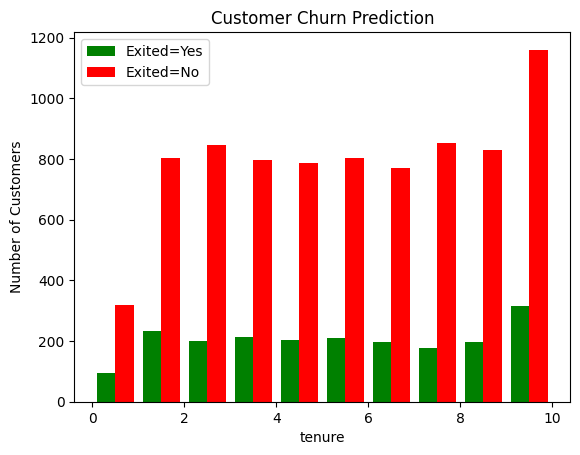

In [41]:
tenure_churn_no = df[df['Exited']==0].Tenure
tenure_churn_yes = df[df['Exited']==1].Tenure


plt.hist([tenure_churn_yes,tenure_churn_no],color =['green','red'],label = ['Exited=Yes', 'Exited=No'])
plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction')
plt.legend()

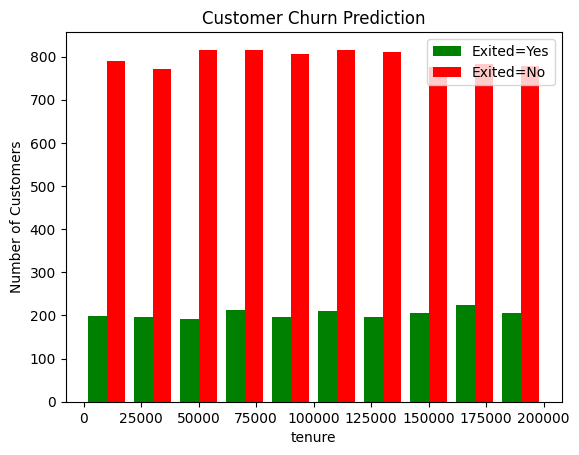

In [42]:
tenure_churn_no = df[df['Exited']==0].EstimatedSalary
tenure_churn_yes = df[df['Exited']==1].EstimatedSalary


plt.hist([tenure_churn_yes,tenure_churn_no],color =['green','red'],label = ['Exited=Yes', 'Exited=No'])
plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction')
plt.legend()

### Scaling the data

In [43]:
cols_to_scale = ['Balance','EstimatedSalary']


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [44]:
df.head()

CreditScore  Gender  Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2  0.000000              1          1   
1          608       0   41       1  0.334031              1          0   
2          502       0   42       8  0.636357              3          1   
3          699       0   39       1  0.000000              2          0   
4          850       0   43       2  0.500246              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1         0.506735       1                 1   
1               1         0.562709       0                 0   
2               0         0.569654       1                 1   
3               0         0.469120       0                 1   
4               1         0.395400       0                 0   

   Geography_Germany  Geography_Spain  
0                  0                0  
1                  0                1  
2                  0                0  
3                  0                0  
4                  0                1

## our dataset is imbalanced so the accuracy might not be so accurate

In [62]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [46]:
X = df.drop('Exited', axis='columns')
y = df['Exited']

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify= y)

In [48]:
X_train.shape

(8000, 12)

In [49]:
X_test.shape

(2000, 12)

In [70]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=(12,),activation='relu'),
    tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.BatchNormalization(),


    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=(['accuracy']))

/home/harry/Documents/Code/Data_Science/DeepLearning/.venv_tf/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
model.fit(X_train, y_train,epochs=100,validation_data=(X_test, y_test))

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7192 - loss: 0.5837 - val_accuracy: 0.7965 - val_loss: 0.4810
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8121 - loss: 0.4341 - val_accuracy: 0.7785 - val_loss: 0.4960
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8178 - loss: 0.4251 - val_accuracy: 0.8030 - val_loss: 0.4583
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8279 - loss: 0.4149 - val_accuracy: 0.7970 - val_loss: 0.9217
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8189 - loss: 0.4260 - val_accuracy: 0.7330 - val_loss: 0.5502
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8128 - loss: 0.4241 - val_accuracy: 0.5120 - val_loss: 0.8195
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8203 - loss: 0.4179 - val_accuracy: 0.7965 - val_loss: 0.7511
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8127 - loss: 0.4365 - val_accu

In [72]:
model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8651 - loss: 0.3461


[0.3683283030986786, 0.8475000262260437]

In [73]:
yp = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [74]:
yp[:5]

array([[0.02022585],
       [0.0229304 ],
       [0.02898625],
       [0.0205694 ],
       [0.14379203]], dtype=float32)

In [75]:
y_test[:5]

5702    0
3667    0
1617    0
5673    0
4272    0
Name: Exited, dtype: int64

In [76]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


In [77]:
y_pred[:50]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1]

In [78]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1593
           1       0.68      0.47      0.56       407

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.73      2000
weighted avg       0.84      0.85      0.84      2000



Text(50.722222222222214, 0.5, 'True')

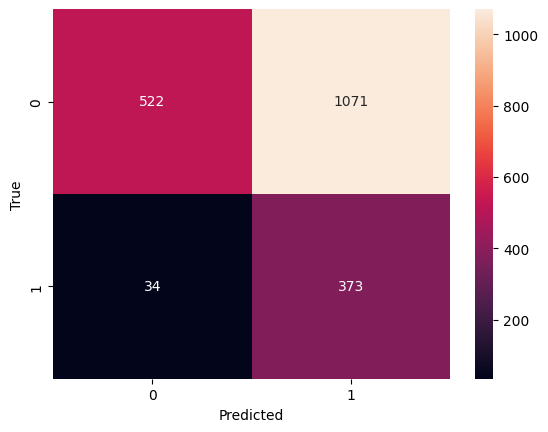

In [59]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)


sns.heatmap(cm, annot=True, fmt='d')   
plt.xlabel('Predicted')
plt.ylabel('True')